# Introduction to NN Framemarks- Handwritten digits recognition problem- assignment.
#Author: Devisha Arunadevi Tiwari


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6248 - accuracy: 0.8289 - val_loss: 0.3191 - val_accuracy: 0.9067
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.9177 - val_loss: 0.2505 - val_accuracy: 0.9276
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2370 - accuracy: 0.9322 - val_loss: 0.2138 - val_accuracy: 0.9390
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2051 - accuracy: 0.9413 - val_loss: 0.1871 - val_accuracy: 0.9451
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1803 - accuracy: 0.9484 - val_loss: 0.1736 - val_accuracy: 0.9503
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1612 - accuracy: 0.9543 - val_loss: 0.1593 - val_accuracy: 0.9530
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1455 - accuracy: 0.9581 - val_loss: 0.1443 - val_accuracy:

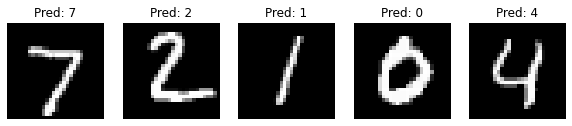

Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the input format of the neural network (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the neural network model
model = models.Sequential()

# Input layer: 784 neurons (28*28 flattened image)
model.add(layers.InputLayer(input_shape=(28 * 28,)))

# Hidden layer 1: 128 neurons with ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Hidden layer 2: 64 neurons with ReLU activation function
model.add(layers.Dense(64, activation='relu'))

# Output layer: 10 neurons with softmax activation (one for each class)
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Step 7: Make predictions on test data
predictions = model.predict(x_test)

# Step 8: Visualize some predictions
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {tf.argmax(predictions[i]).numpy()}")
    plt.axis('off')

plt.show()

# Step 9: Analyze results
# Print the first 5 predictions and the true labels
print("Predicted labels:", tf.argmax(predictions[:5], axis=1).numpy())
print("True labels:", tf.argmax(y_test[:5], axis=1).numpy())

# Step 10: Hyperparameter Tuning (optional)
# Here, you could try different optimizers, learning rates, batch sizes, etc.


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6458 - accuracy: 0.8265 - val_loss: 0.3117 - val_accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2906 - accuracy: 0.9170 - val_loss: 0.2457 - val_accuracy: 0.9306
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2389 - accuracy: 0.9320 - val_loss: 0.2119 - val_accuracy: 0.9386
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2051 - accuracy: 0.9417 - val_loss: 0.1865 - val_accuracy: 0.9460
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1800 - accuracy: 0.9482 - val_loss: 0.1671 - val_accuracy: 0.9521
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1600 - accuracy: 0.9548 - val_loss: 0.1523 - val_accuracy: 0.9546
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1438 - accuracy: 0.9590 - val_loss: 0.1384 - val_accuracy:

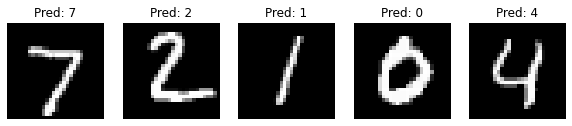

Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1] for better training stability
# Challenge: Model Complexity and Data Preprocessing
# Normalizing helps with faster convergence and avoids issues due to large variations in input values.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the input format of the neural network (28x28 -> 784)
# Flattening the images to 1D so that they can be used as input for a dense neural network.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
# Challenge: Class Imbalance
# MNIST doesn't have significant class imbalance, so this step is not crucial for this dataset.
# However, if the dataset had class imbalance, you would use techniques like class weights or resampling.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the neural network model
# Challenge: Model Complexity
# We are building a relatively simple model here with 2 hidden layers.
# More complex models might involve additional layers or different architectures.

model = models.Sequential()

# Input layer: 784 neurons (28*28 flattened image)
# Challenge: Model Complexity
# The number of input neurons is fixed based on the image size (28x28 = 784).
model.add(layers.InputLayer(input_shape=(28 * 28,)))

# Hidden layer 1: 128 neurons with ReLU activation function
# Challenge: Model Complexity and Activation Functions
# ReLU (Rectified Linear Unit) is chosen here because it is well-suited for image data.
# ReLU helps avoid the vanishing gradient problem and allows the model to learn non-linear patterns.
model.add(layers.Dense(128, activation='relu'))

# Hidden layer 2: 64 neurons with ReLU activation function
# Challenge: Model Complexity
# The number of neurons in this hidden layer is reduced to prevent overfitting.
# This model complexity is chosen based on the need to balance learning capacity and overfitting.
model.add(layers.Dense(64, activation='relu'))

# Output layer: 10 neurons with softmax activation (one for each class)
# Challenge: Activation Functions
# The output layer uses softmax activation, which is suitable for multi-class classification problems.
# Softmax converts the raw model outputs (logits) into probabilities, so the highest probability corresponds to the predicted class.
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the model
# Challenge: Hyperparameter Tuning (Learning Rate)
# We use the SGD optimizer here, which allows us to experiment with different learning rates if needed.
# You can also try other optimizers like Adam for better performance in different scenarios.
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # We are using accuracy as the primary metric.

# Step 5: Train the model
# Challenge: Hyperparameter Tuning (Epochs and Batch Size)
# Here, we train the model for 10 epochs with a batch size of 32. These parameters can be adjusted for better performance.
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 6: Evaluate the model
# Evaluate the trained model on the test data and print the test accuracy.
# Challenge: Evaluation Metrics
# While accuracy is the main evaluation metric, you could also explore other metrics such as F1-score, precision, and recall.
# For example, for imbalanced datasets, accuracy alone might not give the full picture.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Step 7: Make predictions on test data
predictions = model.predict(x_test)

# Step 8: Visualize some predictions
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    # Displaying the predicted class label.
    plt.title(f"Pred: {tf.argmax(predictions[i]).numpy()}")
    plt.axis('off')

plt.show()

# Step 9: Analyze results
# Challenge: Predictions and Interpretability
# The predicted labels are displayed alongside the actual images.
# The model's predictions are easy to interpret since we used softmax activation, and the output is a probability distribution over the classes.
print("Predicted labels:", tf.argmax(predictions[:5], axis=1).numpy())
print("True labels:", tf.argmax(y_test[:5], axis=1).numpy())

# Step 10: Hyperparameter Tuning (optional)
# Challenge: Hyperparameter Tuning
# If further optimization is needed, you could experiment with:
# - Different optimizers (e.g., Adam, RMSprop)
# - Learning rate schedules
# - Batch size and epoch adjustments
# - Regularization techniques like Dropout, L2 regularization, etc.
